New algorithm BFS
[2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 5, 3, 3, 1, 2, 3, 3, 3, 4, 2, 2, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 4, 3, 4, 2, 2, 2, 3, 2, 4, 3, 3, 2, 3, 2, 1, 2, 2, 2, 4, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 4, 2, 3, 1, 3, 2, 4, 3, 3, 4, 2, 2, 2, 4, 4, 3, 2, 3, 2]
272
100
2.72
New algorithm DFS
[2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 5, 3, 3, 1, 2, 3, 3, 3, 4, 2, 2, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 4, 3, 4, 2, 2, 2, 3, 2, 4, 3, 3, 2, 3, 2, 1, 2, 2, 2, 4, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 4, 2, 3, 1, 3, 2, 4, 3, 3, 4, 2, 2, 2, 4, 4, 3, 2, 3, 2]
272
100
2.72
New algorithm GREEDY
New algorithm A*
[0.89, 0.79, 0.79, 0.87, 2.0, 0.85, 0.97, 4.64]
[2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
[3.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
[2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
[0.0527162214123888, 0.0407308237088326, 0.051565492337414955, 0.05225897052181568, 0.14212670403551894

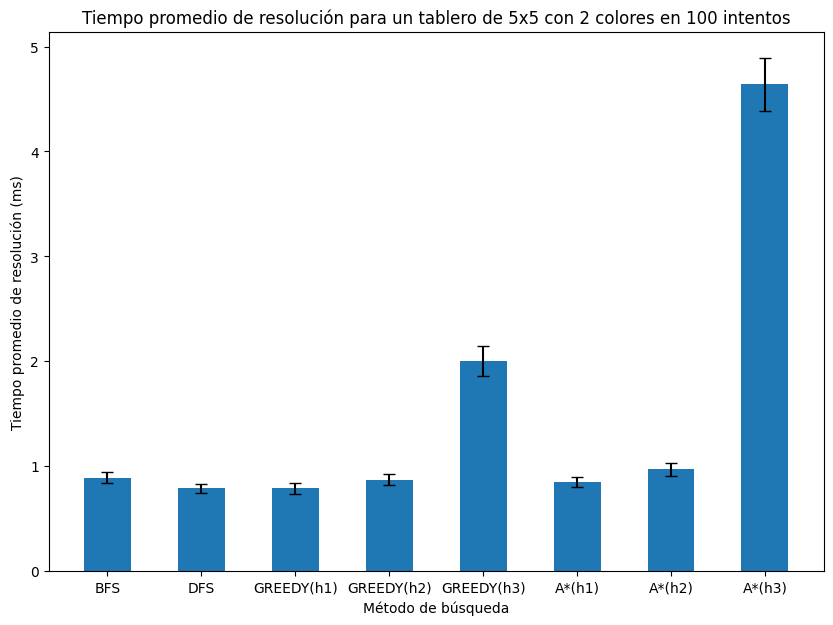

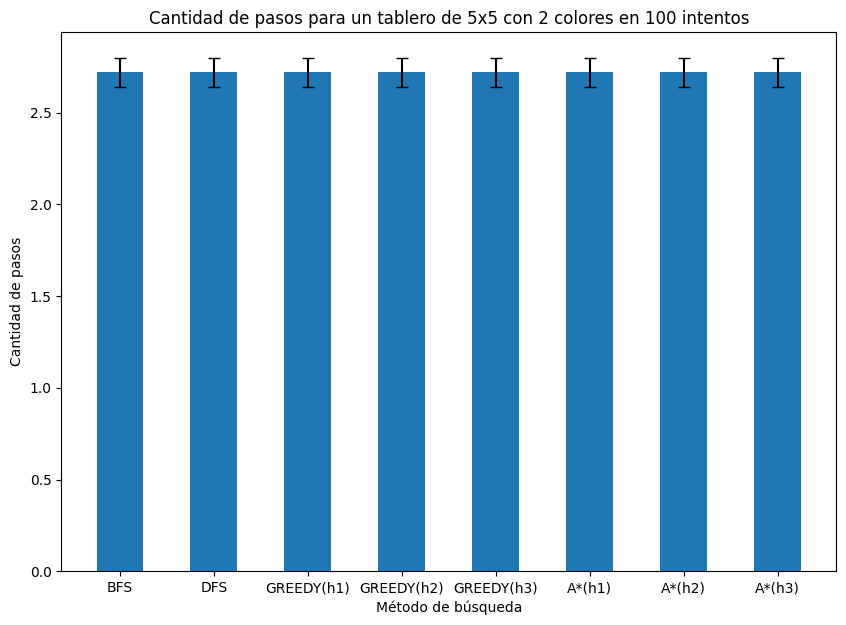

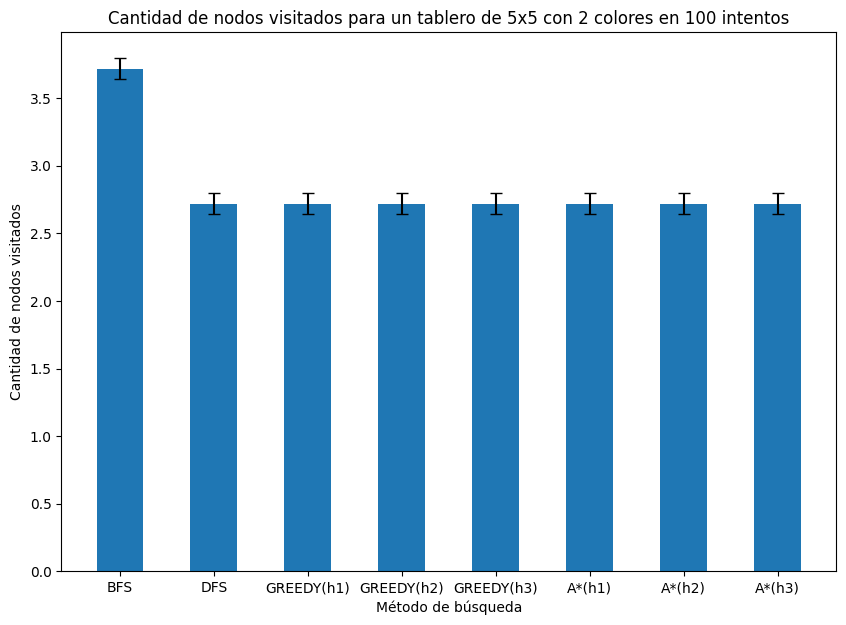

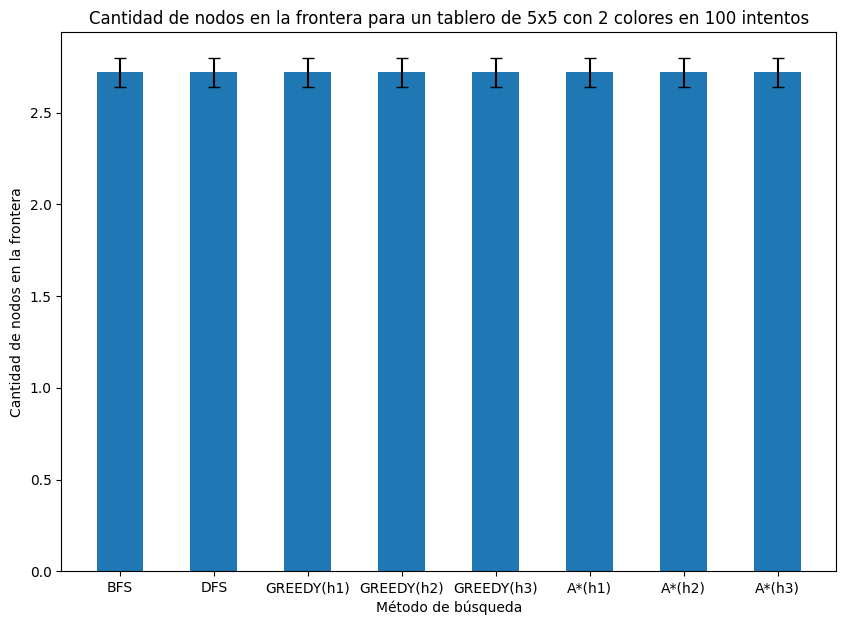

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import COLORS
from src.game_state.board import Board
from src.search_methods.node import Node
from src.search_methods.algorithms import chooseAlgorithm
from src.utils import get_frontier_nodes

ALGORITHMS = ['BFS','DFS', 'GREEDY', 'A*']
HEURISTICS = ['Remaining colors', 'Most neighbors', 'Dijkstra distance']

SIZE = 5
TRIES = 100
COLORS_COUNT = 2
rootNode = None
boards = []

for i in range(TRIES):
    board = Board(SIZE, COLORS_COUNT)
    boards.append(board)
    
    
average_time = [] 
average_steps = [] 
average_visited = []
average_frontier = []
std_errors_time = []
std_errors_steps = []
std_errors_visited = []
std_errors_frontier = []

for algorithm in ALGORITHMS: 
    print(f"New algorithm {algorithm}")
    times = []
    steps= []
    visited_aux= []
    frontier = []
    
    if algorithm == 'BFS' or algorithm == 'DFS':
        for board in boards:
            visited = set()
            solution = []
            time = 0
            rootNode = Node(board, None)
            solution, visited, time = chooseAlgorithm(algorithm, '', solution, visited, rootNode, time)
            times.append(time)
            steps.append(len(solution)-1)
            visited_aux.append(len(visited))
            frontier.append(get_frontier_nodes(visited))
        
        avg_time = sum(times) / len(times)        
        average_time.append(avg_time)
        error_time = np.std(times) / np.sqrt(len(times))
        std_errors_time.append(error_time)

        print(steps)
        print(sum(steps))
        print(len(steps))
        print(sum(steps) / len(steps) )
        avg_step = sum(steps) / len(steps)        
        average_steps.append(avg_step)
        error_step = np.std(steps) / np.sqrt(len(steps))
        std_errors_steps.append(error_step)

        avg_visited = sum(visited_aux) / len(visited_aux)        
        average_visited.append(avg_visited)
        error_visited = np.std(visited_aux) / np.sqrt(len(visited_aux))
        std_errors_visited.append(error_visited)

        avg_frontier = sum(frontier) / len(frontier)        
        average_frontier.append(avg_frontier)
        error_frontier = np.std(frontier) / np.sqrt(len(frontier))
        std_errors_frontier.append(error_frontier)

    else:
        for heuristic in HEURISTICS:          
            times = []
            steps= []
            visited_aux= []
            frontier = []

            for board in boards:
                visited = set()
                solution = []
                time = 0
                rootNode = Node(board, None)
                solution, visited, time = chooseAlgorithm(algorithm, heuristic, solution, visited, rootNode, time)
                times.append(time)
                steps.append(len(solution)-1)
                visited_aux.append(len(visited))
                frontier.append(get_frontier_nodes(visited))
            
            avg_time = sum(times) / len(times)        
            average_time.append(avg_time)
            error_time = np.std(times) / np.sqrt(len(times))
            std_errors_time.append(error_time)

            avg_step = sum(steps) / len(steps)        
            average_steps.append(avg_step)
            error_step = np.std(steps) / np.sqrt(len(steps))
            std_errors_steps.append(error_step)

            avg_visited = sum(visited_aux) / len(visited_aux)        
            average_visited.append(avg_visited)
            error_visited = np.std(visited_aux) / np.sqrt(len(visited_aux))
            std_errors_visited.append(error_visited)

            avg_frontier = sum(frontier) / len(frontier)        
            average_frontier.append(avg_frontier)
            error_frontier = np.std(frontier) / np.sqrt(len(frontier))
            std_errors_frontier.append(error_frontier)

             
ALGORITHMS = ['BFS','DFS', 'GREEDY(h1)', 'GREEDY(h2)', 'GREEDY(h3)', 'A*(h1)', 'A*(h2)', 'A*(h3)']     

print(average_time)
print(average_steps)
print(average_visited)
print(average_frontier)
print(std_errors_time)
print(std_errors_steps)
print(std_errors_visited)
print(std_errors_frontier)
 

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(ALGORITHMS, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para un tablero de {SIZE}x{SIZE} con {COLORS_COUNT} colores en {TRIES} intentos')
plt.xlabel('Método de búsqueda')
plt.ylabel('Tiempo promedio de resolución (ms)')
    
plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(ALGORITHMS, average_steps, yerr=std_errors_steps, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de pasos para un tablero de {SIZE}x{SIZE} con {COLORS_COUNT} colores en {TRIES} intentos')
plt.xlabel('Método de búsqueda')
plt.ylabel('Cantidad de pasos')
plt.show()

#----------------------------------------
#Grafico de cantidad de visitados
fig = plt.figure(figsize =(10, 7))
plt.bar(ALGORITHMS, average_visited, yerr=std_errors_visited, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de nodos visitados para un tablero de {SIZE}x{SIZE} con {COLORS_COUNT} colores en {TRIES} intentos')
plt.xlabel('Método de búsqueda')
plt.ylabel('Cantidad de nodos visitados') 
plt.show()

#----------------------------------------
#Grafico de cantidad de frontera
fig = plt.figure(figsize =(10, 7))
plt.bar(ALGORITHMS, average_frontier, yerr=std_errors_frontier, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de nodos en la frontera para un tablero de {SIZE}x{SIZE} con {COLORS_COUNT} colores en {TRIES} intentos')
plt.xlabel('Método de búsqueda')
plt.ylabel('Cantidad de nodos en la frontera')
plt.show()